<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01273286/blob/main/Data_Analysis_Modulo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Luis Alfonso Sabanero Esquivel A01273286
##Modulo 5 

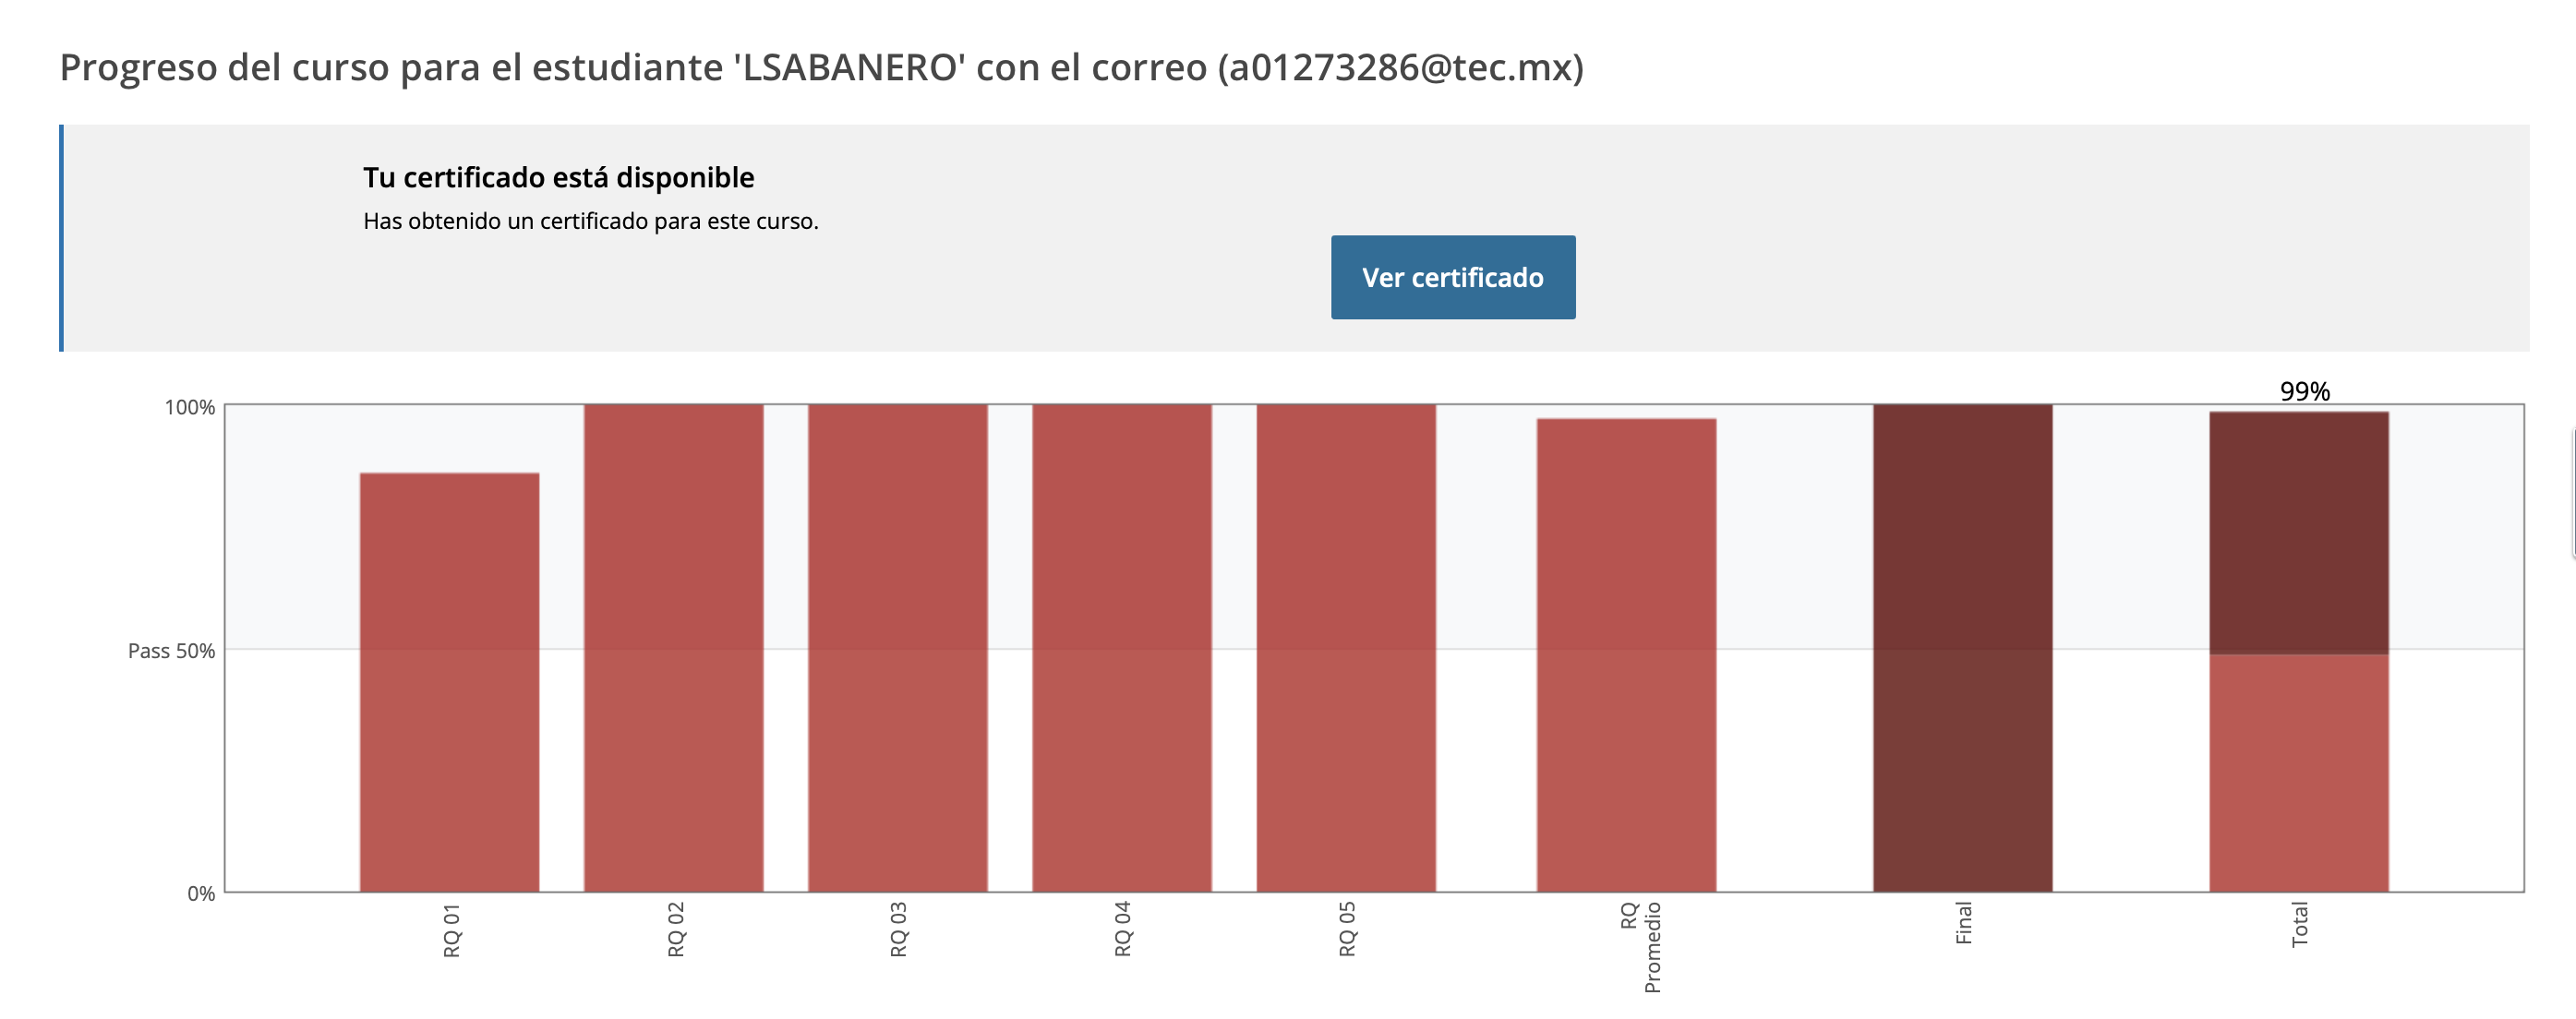

In [1]:
import pandas as pd
import numpy as np

In [3]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [5]:
y_data = df['price']
x_data=df.drop('price',axis=1)

## Nota: En el train test split se usa el parametro test o train size en un rango de 0 a 1

In [7]:
from sklearn.model_selection import train_test_split


x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


## Nota es importante no olvidar las librerias de los modelos

In [8]:
from sklearn.linear_model import LinearRegression #Regresion linear

In [9]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre=LinearRegression()
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1) #Score te da el resultado de la metrica R^2

#Con fit se entrena el set y con predict se predice 

0.7139364665406973

#Validacion cruzada

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

## Overfitting y Underfitting

Nota de IBM:
El sobreajuste ocurre cuando el modelo se ajusta al ruido, pero no al proceso subyacente. Por lo tanto, al probar su modelo con el conjunto de prueba, su modelo no funciona tan bien porque está modelando ruido.

Nota de IBM: El subajuste consiste en que el modelo no contiene los datos suficientes para lograr hacer una prediccion correcta con el set de entrenamiento y validacion 

## Regresion Polinomial

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr1=PolynomialFeatures(degree=2)

In [15]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [16]:
x_train_pr1.shape 

(110, 15)

In [18]:
poly1=LinearRegression().fit(x_train_pr1,y_train)
yhat_test1=poly1.predict(x_test_pr1)

##Regresion RIDGE

In [20]:
from sklearn.linear_model import Ridge

In [21]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

Dado que el score normal no da una metrica aceptable se puede usar el GRIDSERACHCV que se encarga de iterar todos los argumentos para poder obtener los mejores hiperparametros del modelo

Advertencia, entre más parametros tenga más tiempo va a requerir

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1
RR=Ridge()
RR

Ridge()

In [24]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [25]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

#Preguntas

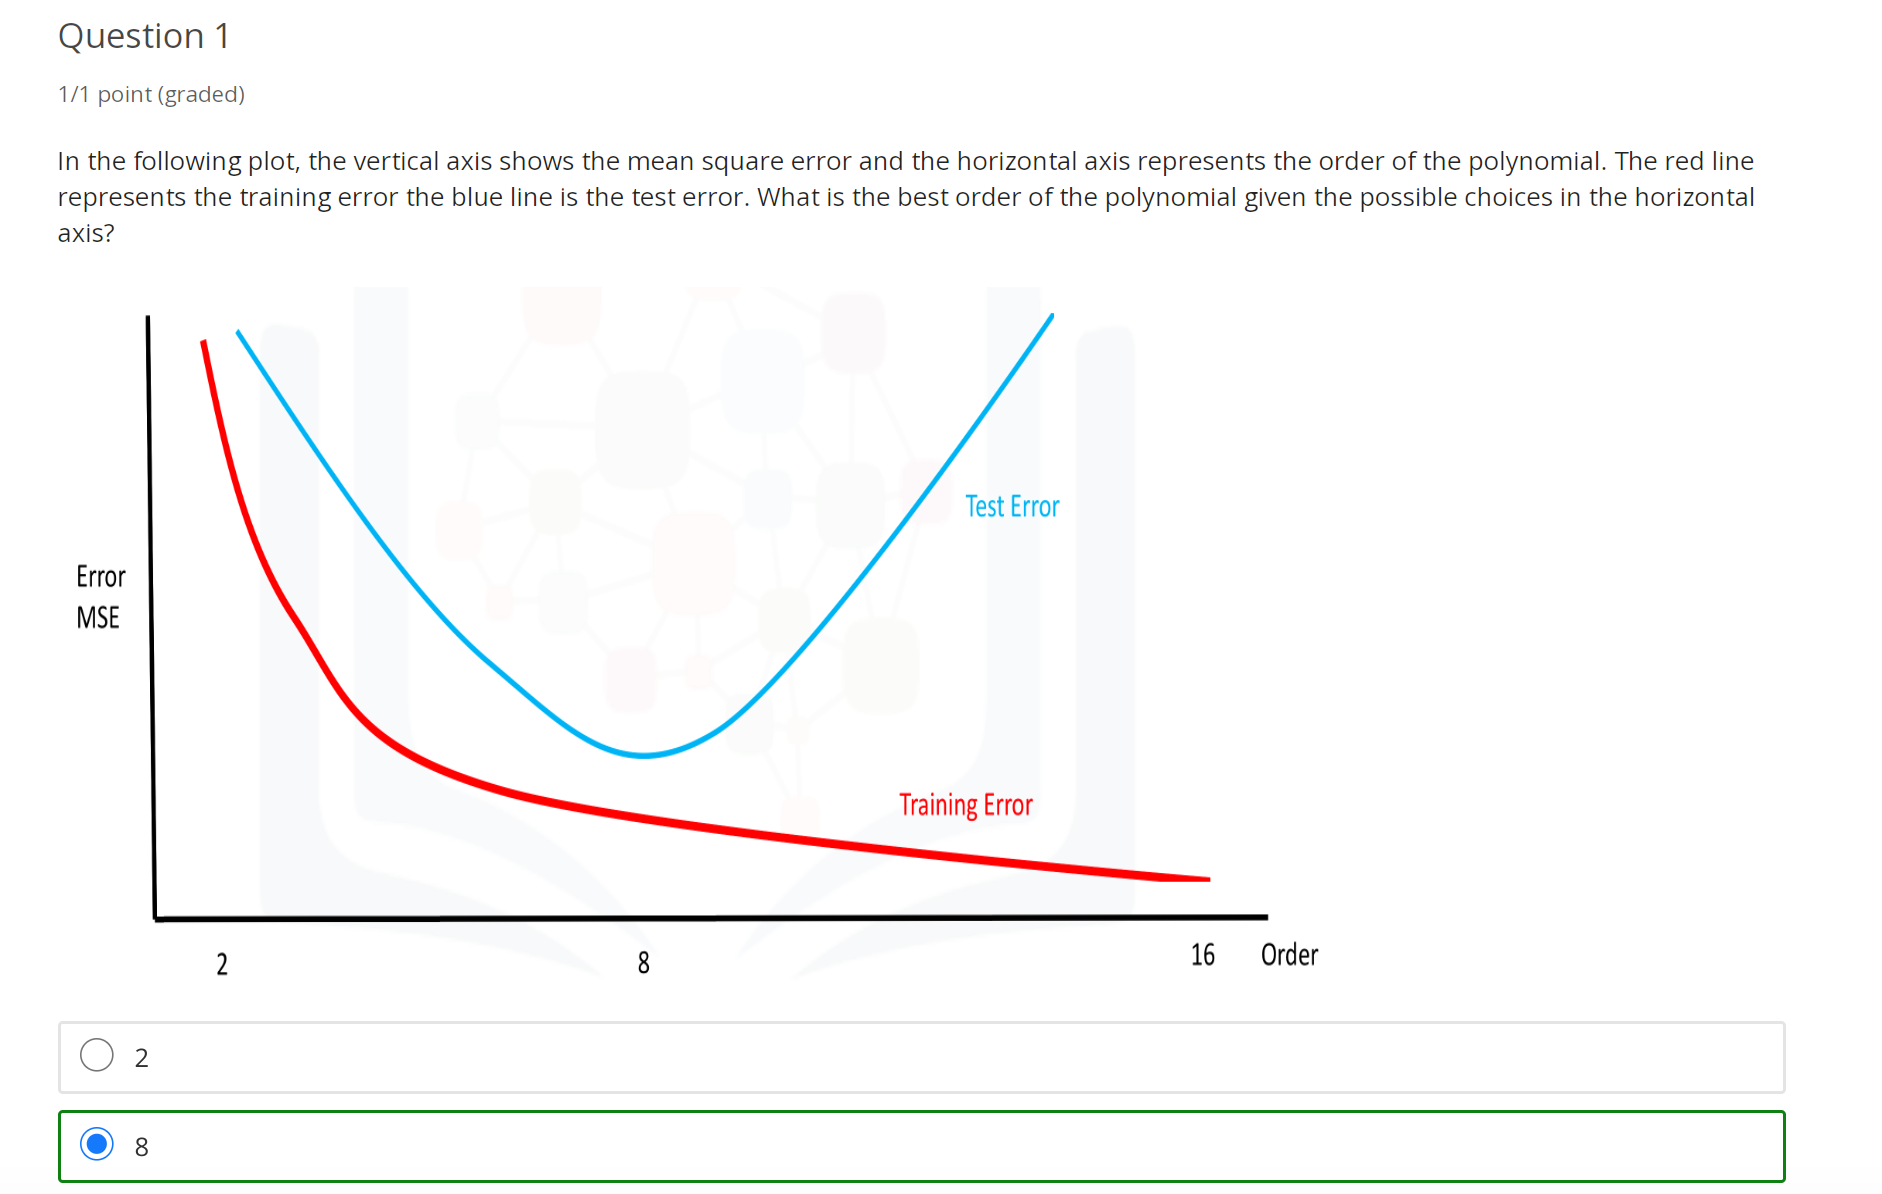

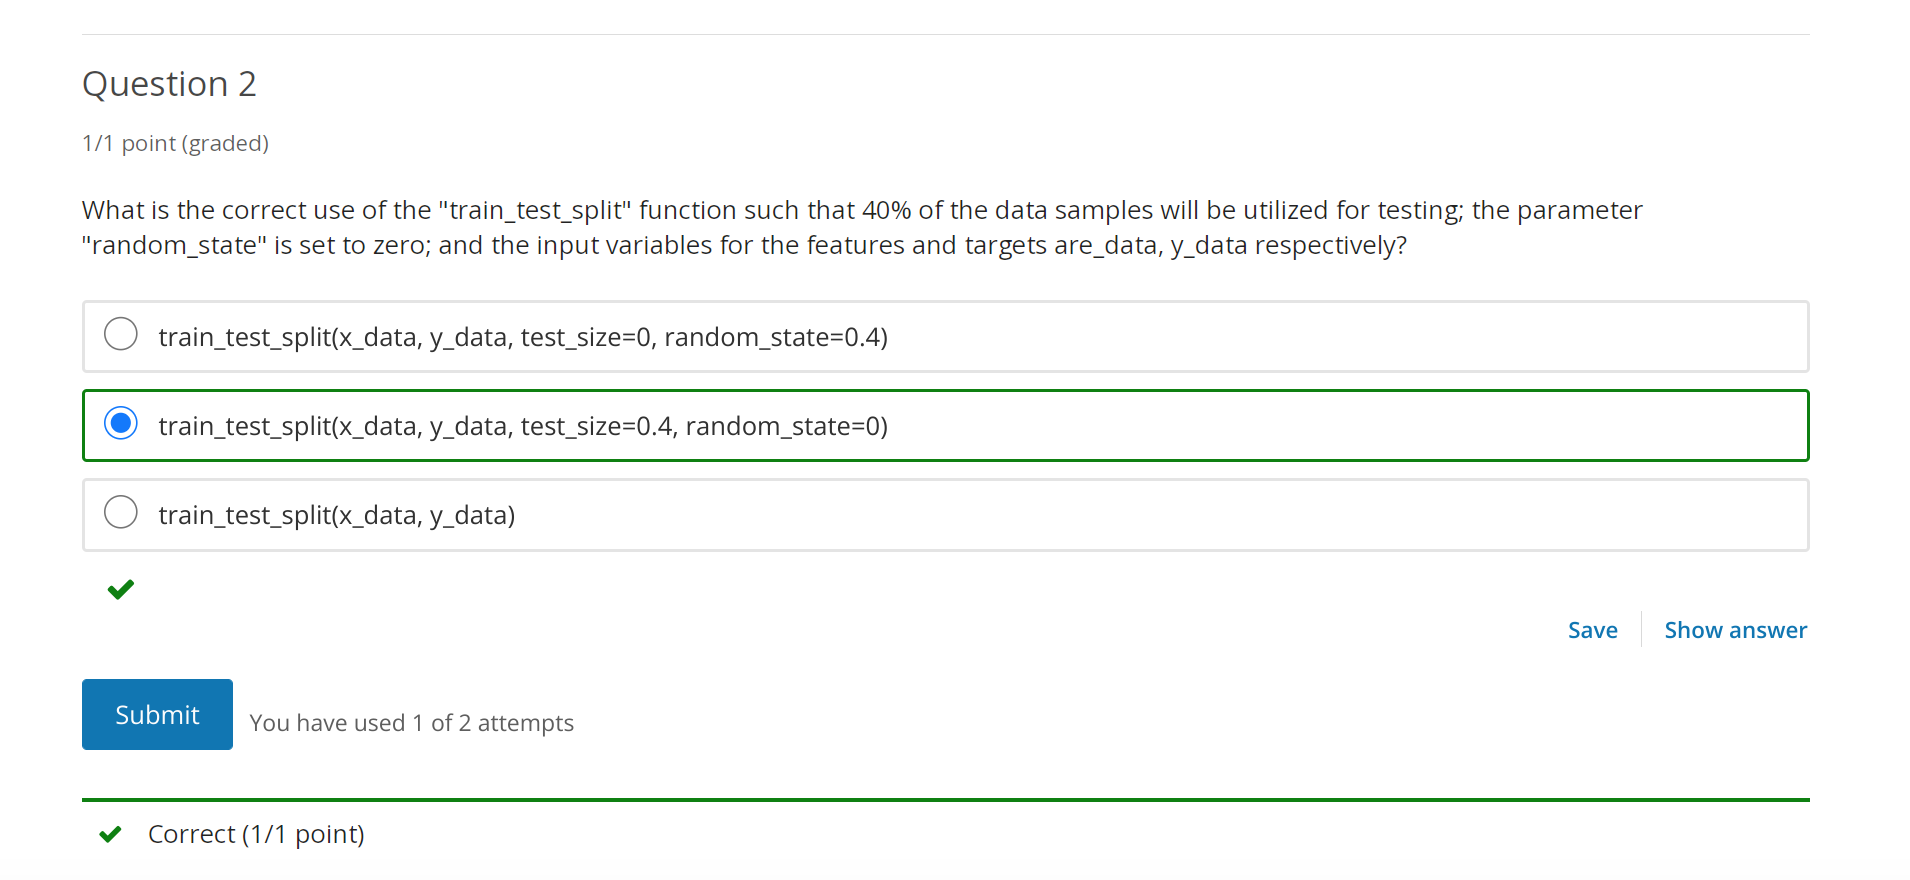

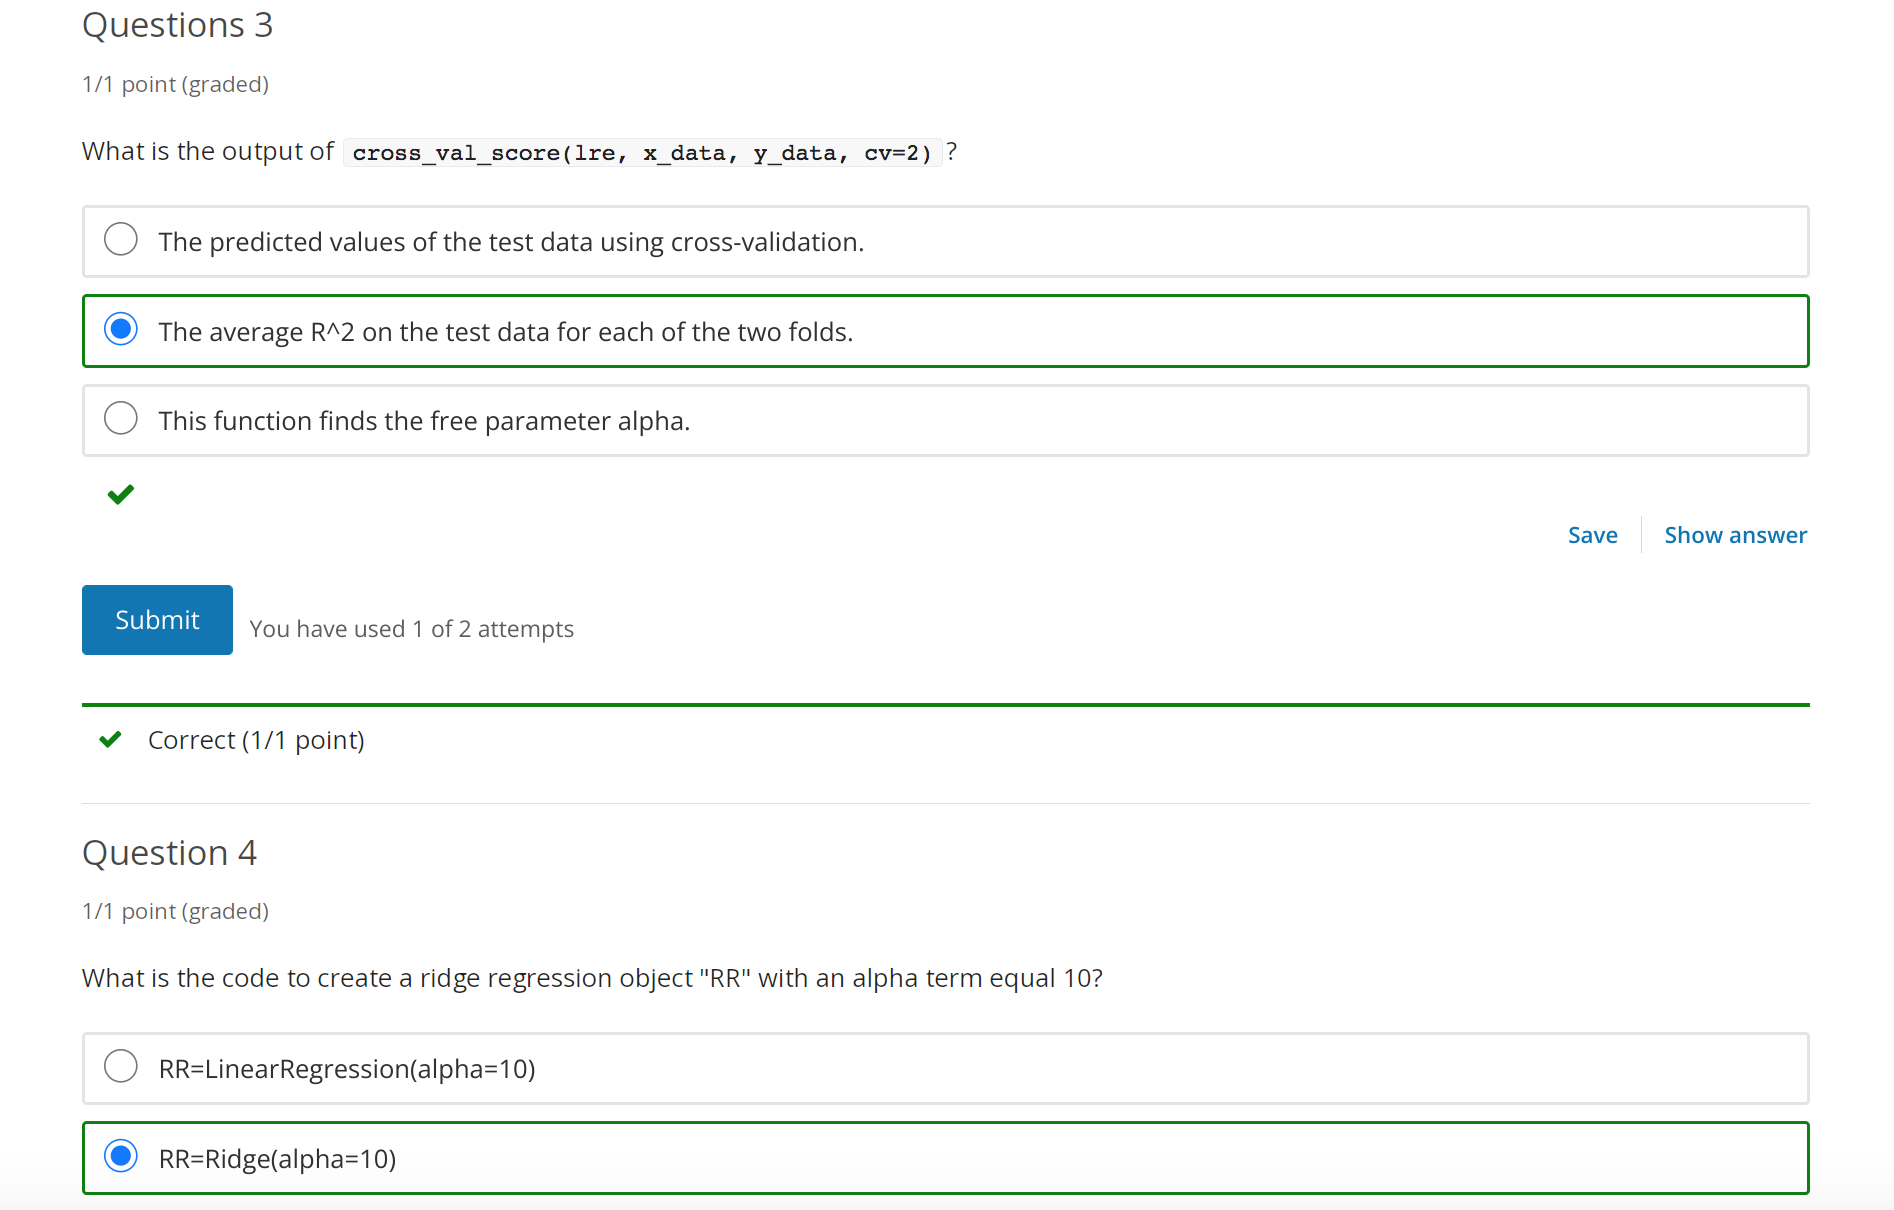

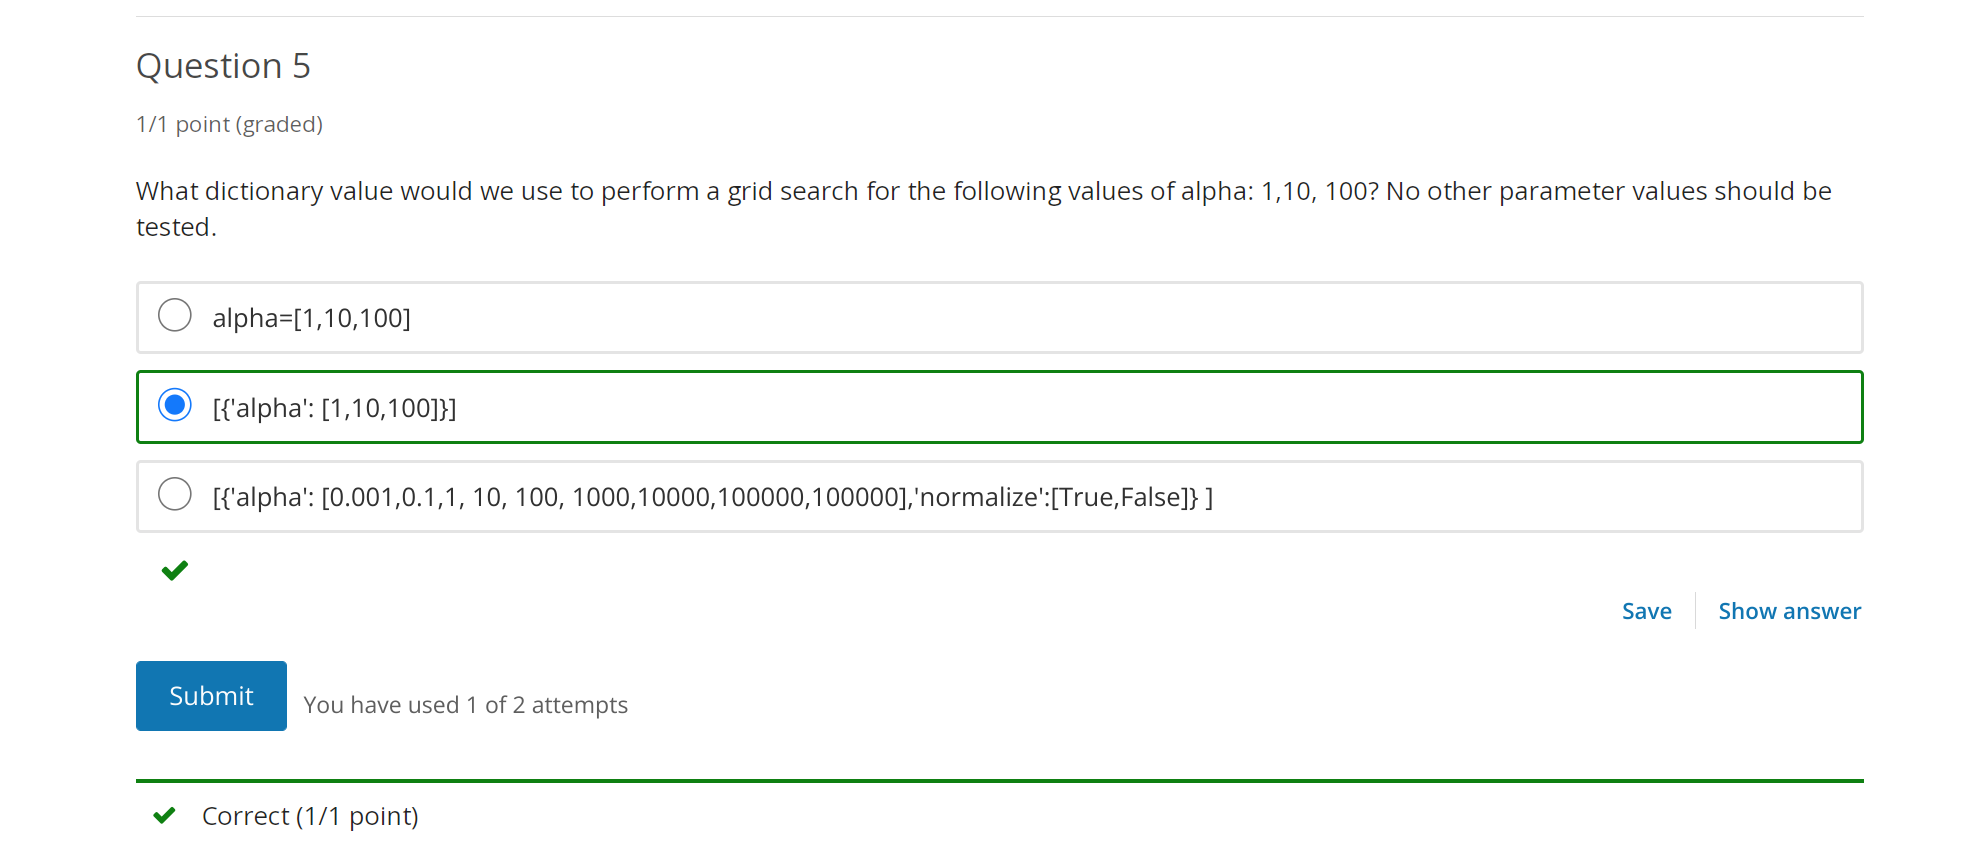